<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Singapore Housing Data and Kaggle Challenge

### Notebook #1 for Exploratory Data Analysis, Modelling Experimentation, and Kaggle Challenge [Individual]

## 1. Exploratory Data Analysis

Perform initial investigations on data to discover patterns and spot anomalies.
<br><br>

### Problem Statement:
Are resale prices of central region HDBs influenced primarily by its location?

In [1]:
# import libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# read csv file into df
train_csv = '../data/train.csv'
train_df = pd.read_csv(train_csv)

train_df

/var/folders/vz/145gpzx54wn19kkmfg10cxyr0000gn/T/ipykernel_75505/4222967168.py:3: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_csv)


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150629,39814,2020-09,WOODLANDS,EXECUTIVE,849,WOODLANDS ST 82,04 TO 06,161.0,Apartment,1995,...,43,0,1.444148,103.794545,189.889876,Evergreen Secondary School,224,0,1.441221,103.793772
150630,147177,2017-06,JURONG WEST,5 ROOM,648D,JURONG WEST ST 61,04 TO 06,110.0,Improved,2001,...,45,0,1.339244,103.698896,614.418470,Boon Lay Secondary School,188,0,1.343224,103.701703
150631,179087,2020-12,BEDOK,EXECUTIVE,639,BEDOK RESERVOIR RD,10 TO 12,144.0,Apartment,1993,...,43,1,1.328471,103.901299,556.889910,Manjusri Secondary School,188,0,1.327520,103.901811
150632,21309,2016-05,QUEENSTOWN,3 ROOM,32,HOLLAND CL,07 TO 09,59.0,Improved,1974,...,82,0,1.299811,103.799965,832.386515,Queensway Secondary School,214,0,1.300475,103.801724


In [3]:
# see all data types
set(train_df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [4]:
# see which columns contain null values
train_df.columns[train_df.isna().any()].tolist()

['Mall_Nearest_Distance',
 'Mall_Within_500m',
 'Mall_Within_1km',
 'Mall_Within_2km',
 'Hawker_Within_500m',
 'Hawker_Within_1km',
 'Hawker_Within_2km']

In [5]:
# how many null values in each column
train_df[['Mall_Nearest_Distance',
 'Mall_Within_500m',
 'Mall_Within_1km',
 'Mall_Within_2km',
 'Hawker_Within_500m',
 'Hawker_Within_1km',
 'Hawker_Within_2km']].isna().sum()

Mall_Nearest_Distance      829
Mall_Within_500m         92789
Mall_Within_1km          25426
Mall_Within_2km           1940
Hawker_Within_500m       97390
Hawker_Within_1km        60868
Hawker_Within_2km        29202
dtype: int64

In [6]:
# determine all flat types
set(train_df['flat_type'])

{'1 ROOM',
 '2 ROOM',
 '3 ROOM',
 '4 ROOM',
 '5 ROOM',
 'EXECUTIVE',
 'MULTI-GENERATION'}

In [7]:
# determine number of planning areas
len(set(train_df['planning_area']))

32

In [8]:
# determine number of sec schs
len(set(train_df['sec_sch_name']))

134

In [9]:
# see all towns
set(train_df['town'])

{'ANG MO KIO',
 'BEDOK',
 'BISHAN',
 'BUKIT BATOK',
 'BUKIT MERAH',
 'BUKIT PANJANG',
 'BUKIT TIMAH',
 'CENTRAL AREA',
 'CHOA CHU KANG',
 'CLEMENTI',
 'GEYLANG',
 'HOUGANG',
 'JURONG EAST',
 'JURONG WEST',
 'KALLANG/WHAMPOA',
 'MARINE PARADE',
 'PASIR RIS',
 'PUNGGOL',
 'QUEENSTOWN',
 'SEMBAWANG',
 'SENGKANG',
 'SERANGOON',
 'TAMPINES',
 'TOA PAYOH',
 'WOODLANDS',
 'YISHUN'}

In [10]:
# sort secondary schools by cutoff_point
train_df[['sec_sch_name','town','cutoff_point']].drop_duplicates().sort_values(by='cutoff_point',ascending=False)

,sec_sch_name,town,cutoff_point
492,Raffles Girls' School,KALLANG/WHAMPOA,260
88,Raffles Girls' School,CENTRAL AREA,260
184,Methodist Girls' School,BUKIT TIMAH,260
2295,Raffles Institution,BISHAN,257
4281,Raffles Institution,TOA PAYOH,257
...,...,...,...
452,Greenridge Secondary School,BUKIT PANJANG,188
165,Broadrick Secondary School,GEYLANG,188
52,Yio Chu Kang Secondary School,ANG MO KIO,188
51,Manjusri Secondary School,GEYLANG,188


In [11]:
# Bishan secondary school cutoff points
set(train_df[train_df['town']=='BISHAN']['cutoff_point'])

{188, 208, 211, 219, 224, 232, 253, 257}

In [12]:
# Bishan secondary schools sorted by cutoff_point
train_df[train_df['town']=='BISHAN'][['sec_sch_name','cutoff_point']].drop_duplicates().sort_values(by='cutoff_point',ascending=False)

,sec_sch_name,cutoff_point
2295,Raffles Institution,257
3,Catholic High School,253
1,Kuo Chuan Presbyterian Secondary School,232
1503,Ang Mo Kio Secondary School,224
1793,Mayflower Secondary School,219
2829,Beatty Secondary School,211
8,Peirce Secondary School,208
18,Guangyang Secondary School,188
208,Whitley Secondary School,188


In [13]:
# Toa Payoh secondary school cutoff points
set(train_df[train_df['town']=='TOA PAYOH']['cutoff_point'])

{188, 211, 234, 243, 254, 257}

In [14]:
# Bishan secondary schools sorted by cutoff_point
train_df[train_df['town']=='TOA PAYOH'][['sec_sch_name','cutoff_point']].drop_duplicates().sort_values(by='cutoff_point',ascending=False) # Toa Payoh secondary schools

,sec_sch_name,cutoff_point
4281,Raffles Institution,257
690,Cedar Girls' Secondary School,254
34,CHIJ Secondary,243
45,Saint Andrew's Secondary School,234
38,Beatty Secondary School,211
28,Guangyang Secondary School,188
79,Bendemeer Secondary School,188
763,Bartley Secondary School,188


In [15]:
# Bukit Timah secondary school cutoff points
set(train_df[train_df['town']=='BUKIT TIMAH']['cutoff_point'])

{188, 241, 260}

In [16]:
# Bukit Timah secondary schools sorted by cutoff_point
train_df[train_df['town']=='BUKIT TIMAH'][['sec_sch_name','cutoff_point']].drop_duplicates().sort_values(by='cutoff_point',ascending=False)

,sec_sch_name,cutoff_point
184,Methodist Girls' School,260
457,Saint Margaret's Secondary School,241
1408,Yusof Ishak Secondary School,188


In [17]:
# Tampines secondary school cutoff points
set(train_df[train_df['town']=='TAMPINES']['cutoff_point'])

{188, 189, 203, 208, 216, 221, 229, 237}

In [18]:
# Tampines secondary schools sorted by cutoff_point
train_df[train_df['town']=='TAMPINES'][['sec_sch_name','cutoff_point']].drop_duplicates().sort_values(by='cutoff_point',ascending=False)

,sec_sch_name,cutoff_point
44,Ngee Ann Secondary School,237
485,Dunman Secondary School,229
132,Saint Hilda's Secondary School,221
11,Pasir Ris Secondary School,216
2577,Meridian Secondary School,208
96,Tampines Secondary School,203
49,Springfield Secondary School,189
146,Changkat Changi Secondary School,189
189,Junyuan Secondary School,188
214,East Spring Secondary School,188


In [19]:
# see all column names
set(train_df.columns)

{'1room_rental',
 '1room_sold',
 '2room_rental',
 '2room_sold',
 '3room_rental',
 '3room_sold',
 '4room_sold',
 '5room_sold',
 'Hawker_Nearest_Distance',
 'Hawker_Within_1km',
 'Hawker_Within_2km',
 'Hawker_Within_500m',
 'Latitude',
 'Longitude',
 'Mall_Nearest_Distance',
 'Mall_Within_1km',
 'Mall_Within_2km',
 'Mall_Within_500m',
 'Tranc_Month',
 'Tranc_Year',
 'Tranc_YearMonth',
 'address',
 'affiliation',
 'block',
 'bus_interchange',
 'bus_stop_latitude',
 'bus_stop_longitude',
 'bus_stop_name',
 'bus_stop_nearest_distance',
 'commercial',
 'cutoff_point',
 'exec_sold',
 'flat_model',
 'flat_type',
 'floor_area_sqft',
 'floor_area_sqm',
 'full_flat_type',
 'hawker_food_stalls',
 'hawker_market_stalls',
 'hdb_age',
 'id',
 'lease_commence_date',
 'lower',
 'market_hawker',
 'max_floor_lvl',
 'mid',
 'mid_storey',
 'mrt_interchange',
 'mrt_latitude',
 'mrt_longitude',
 'mrt_name',
 'mrt_nearest_distance',
 'multigen_sold',
 'multistorey_carpark',
 'other_room_rental',
 'planning_ar

In [20]:
# see headers and values for first row in dict form
sample_keys = train_df.columns.to_list()
sample_values = train_df.iloc[0].to_list()
dict_sample = dict(zip(sample_keys, sample_values))
dict_sample

{'id': 88471,
 'Tranc_YearMonth': '2016-05',
 'town': 'KALLANG/WHAMPOA',
 'flat_type': '4 ROOM',
 'block': '3B',
 'street_name': 'UPP BOON KENG RD',
 'storey_range': '10 TO 12',
 'floor_area_sqm': 90.0,
 'flat_model': 'Model A',
 'lease_commence_date': 2006,
 'resale_price': 680000.0,
 'Tranc_Year': 2016,
 'Tranc_Month': 5,
 'mid_storey': 11,
 'lower': 10,
 'upper': 12,
 'mid': 11,
 'full_flat_type': '4 ROOM Model A',
 'address': '3B, UPP BOON KENG RD',
 'floor_area_sqft': 968.76,
 'price_per_sqft': 701.9282381601222,
 'hdb_age': 15,
 'max_floor_lvl': 25,
 'year_completed': 2005,
 'residential': 'Y',
 'commercial': 'N',
 'market_hawker': 'N',
 'multistorey_carpark': 'N',
 'precinct_pavilion': 'N',
 'total_dwelling_units': 142,
 '1room_sold': 0,
 '2room_sold': 0,
 '3room_sold': 0,
 '4room_sold': 96,
 '5room_sold': 46,
 'exec_sold': 0,
 'multigen_sold': 0,
 'studio_apartment_sold': 0,
 '1room_rental': 0,
 '2room_rental': 0,
 '3room_rental': 0,
 'other_room_rental': 0,
 'postal': '382003'

In [21]:
# attempt to replace NA values in Mall_Nearest_Distance [not implemented]
na_keys = train_df.columns.to_list()
na_values = train_df.isna().sum().to_list()
dict_na = dict(zip(na_keys, na_values))
# dict_na


In [22]:
# attempt to replace NA values in Mall_Nearest_Distance [not implemented]
na_df = train_df[train_df['Mall_Nearest_Distance'].isna()]
na_df = na_df.groupby('street_name')[['street_name', 'Mall_Nearest_Distance']]
# na_df

In [23]:
# attempt to replace NA values in Mall_Nearest_Distance [not implemented]
not_na_df = train_df[train_df['Mall_Nearest_Distance'].notnull()]
not_na_df = not_na_df.groupby('street_name')[['street_name', 'Mall_Nearest_Distance']].head()
not_na_df.drop_duplicates(subset=['street_name'], inplace=True)
not_na_df = not_na_df.reset_index(drop=True)
# not_na_df

In [24]:
# attempt to replace NA values in Mall_Nearest_Distance [not implemented]
rslt_df = not_na_df[not_na_df['street_name'] == 'SEMBAWANG WAY']
rslt_df = rslt_df.reset_index(drop=True)
# rslt_df['Mall_Nearest_Distance'][0]

## 2. Feature Engineering and Modelling Experimentation

Experiment with generating predicted values using a linear regression model.
<br><br>
Generate three sets of predicted values for Kaggle competition:
1. No dummified planning_areas included
2. All dummified planning_areas included
3. Only central dummified planning_areas included

In [25]:
# new df with features of interest
# 'floor_area_sqft','hdb_age','max_floor_lvl' identified as having strong correlation with resale_price
hdb_train = train_df.filter(['resale_price',
                             'floor_area_sqft',
                             'hdb_age',
                             'max_floor_lvl',
                             'mid_storey',
                             '1room_sold',
                             '2room_sold',
                             '3room_sold',
                             '4room_sold',
                             '5room_sold',
                             'exec_sold',
                             'multigen_sold',
                             'studio_apartment_sold',
                             'flat_type',
                             'planning_area',
                             'cutoff_point',
                             'affiliation',
                             'pri_sch_nearest_distance',
                             'sec_sch_nearest_dist'
                             ], axis=1)

hdb_train.head()

,resale_price,floor_area_sqft,hdb_age,max_floor_lvl,mid_storey,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,flat_type,planning_area,cutoff_point,affiliation,pri_sch_nearest_distance,sec_sch_nearest_dist
0,680000.0,968.760,15,25,11,0,0,0,96,46,0,0,0,4 ROOM,Kallang,224,0,1138.633422,1138.633422
1,665000.0,1399.320,34,9,8,0,0,0,56,56,0,0,0,5 ROOM,Bishan,232,0,415.607357,447.894399
2,838000.0,1550.016,24,16,14,0,0,0,0,30,60,0,0,EXECUTIVE,Bukit Batok,188,0,498.849039,180.074558
3,550000.0,1108.692,29,11,3,0,0,0,68,7,0,0,0,4 ROOM,Bishan,253,1,389.515528,389.515528
4,298000.0,893.412,34,4,2,0,0,0,30,18,0,0,0,4 ROOM,Yishun,208,0,401.200584,312.025435


In [26]:
# summary statistics for columns
hdb_train.describe()

,resale_price,floor_area_sqft,hdb_age,max_floor_lvl,mid_storey,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,cutoff_point,affiliation,pri_sch_nearest_distance,sec_sch_nearest_dist
count,1.506340e+05,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000
mean,4.491615e+05,1046.235290,28.551536,15.139816,8.284823,0.138813,1.782055,39.219366,50.083978,26.299853,5.940770,0.023972,0.448564,210.146428,0.031879,395.172974,508.533220
std,1.433076e+05,262.674321,12.138829,6.232492,5.508074,5.947970,11.713826,68.748273,45.302101,33.456575,19.131872,1.135483,5.350617,20.010489,0.175677,234.760931,309.066265
min,1.500000e+05,333.684000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,45.668324,38.913475
25%,3.470000e+05,807.300000,20.000000,12.000000,5.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,227.083163,290.285883
50%,4.200000e+05,1022.580000,29.000000,13.000000,8.000000,0.000000,0.000000,0.000000,44.000000,3.000000,0.000000,0.000000,0.000000,208.000000,0.000000,348.876691,447.377670
75%,5.200000e+05,1205.568000,37.000000,16.000000,11.000000,0.000000,0.000000,66.000000,73.000000,50.000000,0.000000,0.000000,0.000000,224.000000,0.000000,502.179385,644.284099
max,1.258000e+06,3013.920000,55.000000,50.000000,50.000000,255.000000,225.000000,528.000000,316.000000,164.000000,135.000000,66.000000,142.000000,260.000000,1.000000,3305.841039,3638.977233


In [27]:
# numeric df, 16 features, 1 target variable
numeric_hdb_train = train_df.filter(['floor_area_sqm',
                                     'resale_price', # target variable
                                     'floor_area_sqft',
                                     'price_per_sqft',
                                     'hdb_age',
                                     'max_floor_lvl',
                                     'total_dwelling_units',
                                     'Mall_Nearest_Distance',
                                     'Hawker_Nearest_Distance',
                                     'hawker_food_stalls',
                                     'hawker_market_stalls',
                                     'mrt_nearest_distance',
                                     'bus_interchange',
                                     'mrt_interchange',
                                     'bus_stop_nearest_distance',
                                     'pri_sch_nearest_distance',
                                     'sec_sch_nearest_dist'
                                     ], axis=1)

numeric_hdb_train.head()

,floor_area_sqm,resale_price,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,total_dwelling_units,Mall_Nearest_Distance,Hawker_Nearest_Distance,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist
0,90.0,680000.0,968.760,701.928238,15,25,142,1094.090418,154.753357,84,60,330.083069,0,0,29.427395,1138.633422,1138.633422
1,130.0,665000.0,1399.320,475.230826,34,9,112,866.941448,640.151925,80,77,903.659703,1,1,58.207761,415.607357,447.894399
2,144.0,838000.0,1550.016,540.639580,24,16,90,1459.579948,1762.082341,84,95,1334.251197,1,0,214.747860,498.849039,180.074558
3,103.0,550000.0,1108.692,496.080066,29,11,75,950.175199,726.215262,32,86,907.453484,1,1,43.396521,389.515528,389.515528
4,83.0,298000.0,893.412,333.552717,34,4,48,729.771895,1540.151439,45,0,412.343032,0,0,129.422752,401.200584,312.025435


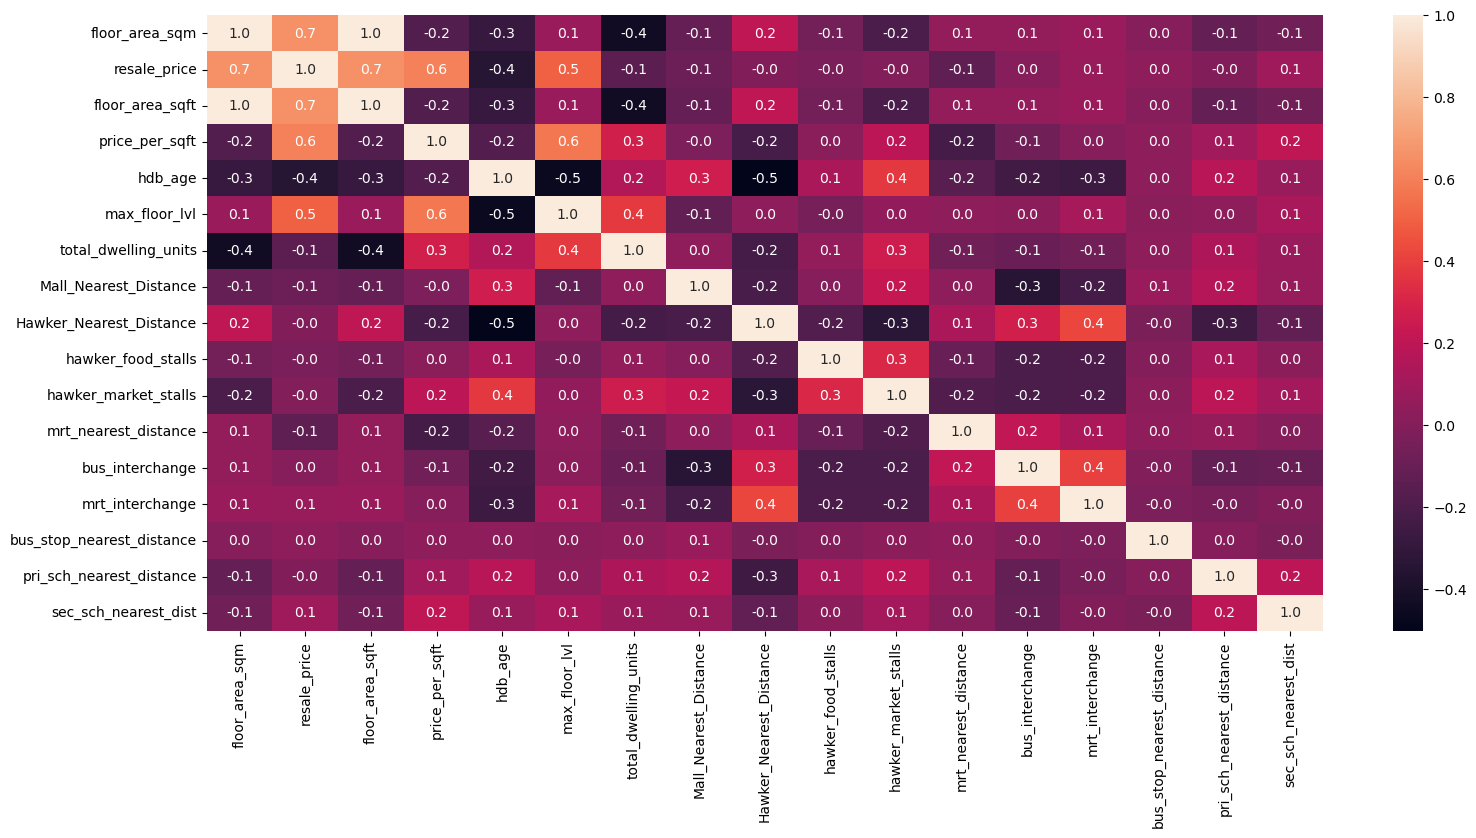

In [28]:
# generate heatmap of all numeric features to see correlation with resale_price
hdb_correlations = numeric_hdb_train.corr();
plt.figure(figsize = (18,8))
sns.heatmap(hdb_correlations, annot=True, fmt=".1f");

In [29]:
# dummify flat_type and planning area
hdb_train = pd.get_dummies(hdb_train,
                           columns=['flat_type'],
                           drop_first=True)

hdb_train = pd.get_dummies(hdb_train,
                           columns=['planning_area'],
                           drop_first=True)

hdb_train.replace({False: 0, True: 1}, inplace=True)

hdb_train

,resale_price,floor_area_sqft,hdb_age,max_floor_lvl,mid_storey,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,...,planning_area_Rochor,planning_area_Sembawang,planning_area_Sengkang,planning_area_Serangoon,planning_area_Tampines,planning_area_Tanglin,planning_area_Toa Payoh,planning_area_Western Water Catchment,planning_area_Woodlands,planning_area_Yishun
0,680000.0,968.760,15,25,11,0,0,0,96,46,...,0,0,0,0,0,0,0,0,0,0
1,665000.0,1399.320,34,9,8,0,0,0,56,56,...,0,0,0,0,0,0,0,0,0,0
2,838000.0,1550.016,24,16,14,0,0,0,0,30,...,0,0,0,0,0,0,0,0,0,0
3,550000.0,1108.692,29,11,3,0,0,0,68,7,...,0,0,0,0,0,0,0,0,0,0
4,298000.0,893.412,34,4,2,0,0,0,30,18,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150629,625000.0,1733.004,26,12,5,0,0,6,4,10,...,0,0,0,0,0,0,0,0,1,0
150630,455000.0,1184.040,20,16,5,0,0,0,30,60,...,0,0,0,0,0,0,0,0,0,0
150631,733000.0,1550.016,28,15,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150632,338000.0,635.076,47,10,8,0,0,200,0,7,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# check for nulls
hdb_train.isnull().sum()

resale_price                             0
floor_area_sqft                          0
hdb_age                                  0
max_floor_lvl                            0
mid_storey                               0
1room_sold                               0
2room_sold                               0
3room_sold                               0
4room_sold                               0
5room_sold                               0
exec_sold                                0
multigen_sold                            0
studio_apartment_sold                    0
cutoff_point                             0
affiliation                              0
pri_sch_nearest_distance                 0
sec_sch_nearest_dist                     0
flat_type_2 ROOM                         0
flat_type_3 ROOM                         0
flat_type_4 ROOM                         0
flat_type_5 ROOM                         0
flat_type_EXECUTIVE                      0
flat_type_MULTI-GENERATION               0
planning_ar

In [31]:
# check column data types
hdb_train.dtypes

resale_price                             float64
floor_area_sqft                          float64
hdb_age                                    int64
max_floor_lvl                              int64
mid_storey                                 int64
1room_sold                                 int64
2room_sold                                 int64
3room_sold                                 int64
4room_sold                                 int64
5room_sold                                 int64
exec_sold                                  int64
multigen_sold                              int64
studio_apartment_sold                      int64
cutoff_point                               int64
affiliation                                int64
pri_sch_nearest_distance                 float64
sec_sch_nearest_dist                     float64
flat_type_2 ROOM                           int64
flat_type_3 ROOM                           int64
flat_type_4 ROOM                           int64
flat_type_5 ROOM    

In [32]:
# current list of features
hdb_train.columns.to_list()

['resale_price',
 'floor_area_sqft',
 'hdb_age',
 'max_floor_lvl',
 'mid_storey',
 '1room_sold',
 '2room_sold',
 '3room_sold',
 '4room_sold',
 '5room_sold',
 'exec_sold',
 'multigen_sold',
 'studio_apartment_sold',
 'cutoff_point',
 'affiliation',
 'pri_sch_nearest_distance',
 'sec_sch_nearest_dist',
 'flat_type_2 ROOM',
 'flat_type_3 ROOM',
 'flat_type_4 ROOM',
 'flat_type_5 ROOM',
 'flat_type_EXECUTIVE',
 'flat_type_MULTI-GENERATION',
 'planning_area_Bedok',
 'planning_area_Bishan',
 'planning_area_Bukit Batok',
 'planning_area_Bukit Merah',
 'planning_area_Bukit Panjang',
 'planning_area_Bukit Timah',
 'planning_area_Changi',
 'planning_area_Choa Chu Kang',
 'planning_area_Clementi',
 'planning_area_Downtown Core',
 'planning_area_Geylang',
 'planning_area_Hougang',
 'planning_area_Jurong East',
 'planning_area_Jurong West',
 'planning_area_Kallang',
 'planning_area_Marine Parade',
 'planning_area_Novena',
 'planning_area_Outram',
 'planning_area_Pasir Ris',
 'planning_area_Punggol'

In [33]:
"""
# create X and y
# only central region
FEATURES = ['floor_area_sqft',
 'hdb_age',
 'max_floor_lvl',
 'mid_storey',
 '1room_sold',
 '2room_sold',
 '3room_sold',
 '4room_sold',
 '5room_sold',
 'exec_sold',
 'multigen_sold',
 'studio_apartment_sold',
 'cutoff_point',
 'affiliation',
 'flat_type_2 ROOM',
 'flat_type_3 ROOM',
 'flat_type_4 ROOM',
 'flat_type_5 ROOM',
 'flat_type_EXECUTIVE',
 'flat_type_MULTI-GENERATION',
 'planning_area_Bishan',
 'planning_area_Bukit Merah',
 'planning_area_Bukit Timah',
 'planning_area_Downtown Core',
 'planning_area_Kallang',
 'planning_area_Novena',
 'planning_area_Outram',
 'planning_area_Queenstown',
 'planning_area_Rochor',
 'planning_area_Tanglin',
 'planning_area_Toa Payoh',
 'planning_area_Western Water Catchment'
]

X = hdb_train[FEATURES]
y = hdb_train['resale_price'].values

# Verify dimensions
print('X: ', X.shape)
print('y: ', y.shape)
"""

"\n# create X and y\n# only central region\nFEATURES = ['floor_area_sqft',\n 'hdb_age',\n 'max_floor_lvl',\n 'mid_storey',\n '1room_sold',\n '2room_sold',\n '3room_sold',\n '4room_sold',\n '5room_sold',\n 'exec_sold',\n 'multigen_sold',\n 'studio_apartment_sold',\n 'cutoff_point',\n 'affiliation',\n 'flat_type_2 ROOM',\n 'flat_type_3 ROOM',\n 'flat_type_4 ROOM',\n 'flat_type_5 ROOM',\n 'flat_type_EXECUTIVE',\n 'flat_type_MULTI-GENERATION',\n 'planning_area_Bishan',\n 'planning_area_Bukit Merah',\n 'planning_area_Bukit Timah',\n 'planning_area_Downtown Core',\n 'planning_area_Kallang',\n 'planning_area_Novena',\n 'planning_area_Outram',\n 'planning_area_Queenstown',\n 'planning_area_Rochor',\n 'planning_area_Tanglin',\n 'planning_area_Toa Payoh',\n 'planning_area_Western Water Catchment'\n]\n\nX = hdb_train[FEATURES]\ny = hdb_train['resale_price'].values\n\n# Verify dimensions\nprint('X: ', X.shape)\nprint('y: ', y.shape)\n"

In [34]:
# add columns for interaction terms
hdb_train['affiliation * cutoff_point'] = hdb_train['affiliation'] * hdb_train['cutoff_point']
hdb_train['floor_area_sqft x max_floor_lvl'] = hdb_train['floor_area_sqft'] * hdb_train['max_floor_lvl']
hdb_train['floor_area_sqft x hdb_age'] = hdb_train['floor_area_sqft'] * hdb_train['hdb_age']
hdb_train['pri_sch_nearest_distance x sec_sch_nearest_dist'] = hdb_train['pri_sch_nearest_distance'] * hdb_train['sec_sch_nearest_dist']

hdb_train.head(20)

,resale_price,floor_area_sqft,hdb_age,max_floor_lvl,mid_storey,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,...,planning_area_Tampines,planning_area_Tanglin,planning_area_Toa Payoh,planning_area_Western Water Catchment,planning_area_Woodlands,planning_area_Yishun,affiliation * cutoff_point,floor_area_sqft x max_floor_lvl,floor_area_sqft x hdb_age,pri_sch_nearest_distance x sec_sch_nearest_dist
0,680000.0,968.760,15,25,11,0,0,0,96,46,...,0,0,0,0,0,0,0,24219.000,14531.400,1.296486e+06
1,665000.0,1399.320,34,9,8,0,0,0,56,56,...,0,0,0,0,0,0,0,12593.880,47576.880,1.861482e+05
2,838000.0,1550.016,24,16,14,0,0,0,0,30,...,0,0,0,0,0,0,0,24800.256,37200.384,8.983002e+04
3,550000.0,1108.692,29,11,3,0,0,0,68,7,...,0,0,0,0,0,0,253,12195.612,32152.068,1.517223e+05
4,298000.0,893.412,34,4,2,0,0,0,30,18,...,0,0,0,0,0,1,0,3573.648,30376.008,1.251848e+05
5,335000.0,699.660,46,12,8,0,0,188,0,5,...,0,0,0,0,0,0,0,8395.920,32184.360,3.617282e+05
6,433000.0,1291.680,34,17,8,0,0,0,0,64,...,0,0,0,0,0,0,0,21958.560,43917.120,9.778490e+04
7,340000.0,731.952,41,12,8,0,0,110,22,0,...,0,0,0,0,0,0,0,8783.424,30010.032,3.054408e+05
8,700000.0,1345.500,32,25,11,0,0,0,0,84,...,0,0,0,0,0,0,0,33637.500,43056.000,3.451361e+05
9,490000.0,1184.040,20,17,11,0,0,0,32,64,...,0,0,0,0,0,0,0,20128.680,23680.800,4.325822e+04


In [35]:
# create X and y
# all planning areas
FEATURES = ['floor_area_sqft',
 'hdb_age',
 'max_floor_lvl',
 'mid_storey',
 '1room_sold',
 '2room_sold',
 '3room_sold',
 '4room_sold',
 '5room_sold',
 'exec_sold',
 'multigen_sold',
 'studio_apartment_sold',
 'cutoff_point',
 'affiliation',
 'flat_type_2 ROOM',
 'flat_type_3 ROOM',
 'flat_type_4 ROOM',
 'flat_type_5 ROOM',
 'flat_type_EXECUTIVE',
 'flat_type_MULTI-GENERATION',
 'planning_area_Bedok',
 'planning_area_Bishan',
 'planning_area_Bukit Batok',
 'planning_area_Bukit Merah',
 'planning_area_Bukit Panjang',
 'planning_area_Bukit Timah',
 'planning_area_Changi',
 'planning_area_Choa Chu Kang',
 'planning_area_Clementi',
 'planning_area_Downtown Core',
 'planning_area_Geylang',
 'planning_area_Hougang',
 'planning_area_Jurong East',
 'planning_area_Jurong West',
 'planning_area_Kallang',
 'planning_area_Marine Parade',
 'planning_area_Novena',
 'planning_area_Outram',
 'planning_area_Pasir Ris',
 'planning_area_Punggol',
 'planning_area_Queenstown',
 'planning_area_Rochor',
 'planning_area_Sembawang',
 'planning_area_Sengkang',
 'planning_area_Serangoon',
 'planning_area_Tampines',
 'planning_area_Tanglin',
 'planning_area_Toa Payoh',
 'planning_area_Western Water Catchment',
 'planning_area_Woodlands',
 'planning_area_Yishun',
 'affiliation * cutoff_point',
 'floor_area_sqft x max_floor_lvl',
 'floor_area_sqft x hdb_age',
 'pri_sch_nearest_distance x sec_sch_nearest_dist'
]

X = hdb_train[FEATURES]
y = hdb_train['resale_price'].values

# verify dimensions
print('X: ', X.shape)
print('y: ', y.shape)

X:  (150634, 55)
y:  (150634,)


In [36]:
# default train-test split ratio is 75% to 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [37]:
# create an instance of linear regression
lr = LinearRegression()

# fit model instance on train data
lr.fit(X_train, y_train);

# generate predictions
preds = lr.predict(X_test)

X_test

,floor_area_sqft,hdb_age,max_floor_lvl,mid_storey,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,...,planning_area_Tampines,planning_area_Tanglin,planning_area_Toa Payoh,planning_area_Western Water Catchment,planning_area_Woodlands,planning_area_Yishun,affiliation * cutoff_point,floor_area_sqft x max_floor_lvl,floor_area_sqft x hdb_age,pri_sch_nearest_distance x sec_sch_nearest_dist
134015,710.424,40,16,5,0,0,236,0,2,0,...,0,0,0,0,0,0,0,11366.784,28416.960,605309.249970
73640,1453.140,25,12,8,0,0,0,18,55,0,...,0,0,0,0,0,0,0,17437.680,36328.500,54077.325374
70016,1087.164,23,12,11,0,0,0,103,44,0,...,0,0,0,0,1,0,0,13045.968,25004.772,125539.824788
96417,968.760,21,16,14,0,0,0,92,93,0,...,0,0,0,0,0,0,0,15500.160,20343.960,108902.914817
85900,914.940,17,28,11,0,0,0,51,56,0,...,0,0,0,0,0,0,0,25618.320,15553.980,250498.206390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11325,1140.984,28,14,5,0,0,0,71,23,0,...,0,0,0,0,0,0,0,15973.776,31947.552,238990.769678
135258,904.176,33,12,2,0,0,0,132,0,0,...,0,0,0,0,0,1,0,10850.112,29837.808,188776.695133
69310,1108.692,31,9,8,0,0,0,40,8,0,...,0,0,0,0,0,0,0,9978.228,34369.452,61993.785339
52308,1582.308,34,13,8,0,0,0,0,0,72,...,0,0,0,0,0,1,0,20570.004,53798.472,313676.606650


In [38]:
# train score, R^2
lr.score(X_train, y_train)

0.8317830556978774

In [39]:
# test score, R^2
lr.score(X_test, y_test)

0.8344215093967549

In [40]:
# cross validation score
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.8315756786188976

In [41]:
# MSE
MSE_train_score = mean_squared_error(y_train, lr.predict(X_train))
MSE_test_score = mean_squared_error(y_test, preds)

print(f'MSE on training set: {MSE_train_score}')
print(f'MSE on testing set: {MSE_test_score}')

MSE on training set: 3458136888.948278
MSE on testing set: 3390144186.6116533


In [42]:
# RMSE
RMSE_train_score = (mean_squared_error(y_train, lr.predict(X_train)))**(0.5)
RMSE_test_score = (mean_squared_error(y_test, preds))**(0.5)

print(f'RMSE on training set: {RMSE_train_score}')
print(f'RMSE on testing set: {RMSE_test_score}')

RMSE on training set: 58805.92562785045
RMSE on testing set: 58224.9447111086


In [43]:
X_train = sm.add_constant(X_train)

In [44]:
X_train.dtypes

const                                              float64
floor_area_sqft                                    float64
hdb_age                                              int64
max_floor_lvl                                        int64
mid_storey                                           int64
1room_sold                                           int64
2room_sold                                           int64
3room_sold                                           int64
4room_sold                                           int64
5room_sold                                           int64
exec_sold                                            int64
multigen_sold                                        int64
studio_apartment_sold                                int64
cutoff_point                                         int64
affiliation                                          int64
flat_type_2 ROOM                                     int64
flat_type_3 ROOM                                     int

In [45]:
# fit ordinary least squares (OLS) model on train data
model_sm = sm.OLS(y_train, X_train).fit()

In [46]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 1.034e+04
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:07:45   Log-Likelihood:            -1.4010e+06
No. Observations:              112975   AIC:                         2.802e+06
Df Residuals:                  112920   BIC:                         2.803e+06
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                            3.633e+05   6095.230     59.598      0.000    3.51e+05    3.75e+05
floor_area_sqft                                   106.3964      4.933     21.568      0.000      96.728     116.065
hdb_age                                         -6173.7158     88.880    -69.461      0.000   -6347.919   -5999.512
max_floor_lvl                                   -6565.0490    177.659    -36.953      0.000   -6913.258   -6216.840
mid_storey                                       3357.5159     38.312     87.636      0.000    3282.425    3432.607
1room_sold                                       -179.1319     33.529     -5.343      0.000    -244.849    -113.415
2room_sold                                       -470.2331     21.053    -22.335      0.000    -511.498    -428.969
3room_sold                                        -69.2963      4.774    -14.515      0.000     -78.654     -59.939
4room_sold                                        -21.1321      6.312     -3.348      0.001     -33.504      -8.760
5room_sold                                       -139.3183      9.303    -14.976      0.000    -157.552    -121.084
exec_sold                                        -286.8815     21.088    -13.604      0.000    -328.214    -245.549
multigen_sold                                    -186.2884    380.029     -0.490      0.624    -931.141     558.564
studio_apartment_sold                              -1.3873     34.291     -0.040      0.968     -68.597      65.823
cutoff_point                                      126.8451     10.879     11.660      0.000     105.522     148.168
affiliation                                      9.391e+05   7.83e+04     11.997      0.000    7.86e+05    1.09e+06
flat_type_2 ROOM                                 5148.0243   3947.434      1.304      0.192   -2588.886    1.29e+04
flat_type_3 ROOM                                 1.749e+04   3406.765      5.134      0.000    1.08e+04    2.42e+04
flat_type_4 ROOM                                 2.421e+04   3366.211      7.191      0.000    1.76e+04    3.08e+04
flat_type_5 ROOM                                  3.79e+04   3487.151     10.867      0.000    3.11e+04    4.47e+04
flat_type_EXECUTIVE                              1.046e+05   3916.904     26.703      0.000    9.69e+04    1.12e+05
flat_type_MULTI-GENERATION                       1.739e+05   1.97e+04      8.841      0.000    1.35e+05    2.12e+05
planning_area_Bedok                             -1.512e+04   1131.790    -13.363      0.000   -1.73e+04   -1.29e+04
planning_area_Bishan                             7.667e+04   1552.695     49.378      0.000    7.36e+04    7.97e+04
planning_area_Bukit Batok                       -7.914e+04   1245.8

## 3. Kaggle Submission

![Kaggle Submission](../kaggle/individual-kaggle-submission.png)

In [47]:
"""
# Generate predicted resale prices for test sample (Kaggle)

test_csv = '../data/test.csv'
test_df = pd.read_csv(test_csv)

pred_sample = pd.DataFrame()
pred_sample['Id'] = test_df['id']

test_df = test_df.filter(['floor_area_sqft', 'hdb_age', 'max_floor_lvl', 'mid_storey',
       '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',
       'exec_sold', 'multigen_sold', 'studio_apartment_sold', 'cutoff_point',
       'affiliation', 'flat_type', 'planning_area'], axis=1)

test_df = pd.get_dummies(test_df,
                         columns=['flat_type'],
                         drop_first=True)

test_df = pd.get_dummies(test_df,
                         columns=['planning_area'],
                         drop_first=True)

test_df = test_df.filter(['floor_area_sqft', 'hdb_age', 'max_floor_lvl', 'mid_storey',
       '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',
       'exec_sold', 'multigen_sold', 'studio_apartment_sold', 'cutoff_point',
       'affiliation',
       'flat_type_2 ROOM',
       'flat_type_3 ROOM',
       'flat_type_4 ROOM',
       'flat_type_5 ROOM',
       'flat_type_EXECUTIVE',
       'flat_type_MULTI-GENERATION',
       'planning_area_Bedok',
       'planning_area_Bishan',
       'planning_area_Bukit Batok',
       'planning_area_Bukit Merah',
       'planning_area_Bukit Panjang',
       'planning_area_Bukit Timah',
       'planning_area_Changi',
       'planning_area_Choa Chu Kang',
       'planning_area_Clementi',
       'planning_area_Downtown Core',
       'planning_area_Geylang',
       'planning_area_Hougang',
       'planning_area_Jurong East',
       'planning_area_Jurong West',
       'planning_area_Kallang',
       'planning_area_Marine Parade',
       'planning_area_Novena',
       'planning_area_Outram',
       'planning_area_Pasir Ris',
       'planning_area_Punggol',
       'planning_area_Queenstown',
       'planning_area_Rochor',
       'planning_area_Sembawang',
       'planning_area_Sengkang',
       'planning_area_Serangoon',
       'planning_area_Tampines',
       'planning_area_Tanglin',
       'planning_area_Toa Payoh',
       'planning_area_Western Water Catchment',
       'planning_area_Woodlands',
       'planning_area_Yishun'], axis=1)

prediction = lr.predict(test_df)
pred_sample['Predicted'] = prediction

# pred_sample.to_csv('pred_3.csv', index=False)
"""

"\n# Generate predicted resale prices for test sample (Kaggle)\n\ntest_csv = '../data/test.csv'\ntest_df = pd.read_csv(test_csv)\n\npred_sample = pd.DataFrame()\npred_sample['Id'] = test_df['id']\n\ntest_df = test_df.filter(['floor_area_sqft', 'hdb_age', 'max_floor_lvl', 'mid_storey',\n       '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',\n       'exec_sold', 'multigen_sold', 'studio_apartment_sold', 'cutoff_point',\n       'affiliation', 'flat_type', 'planning_area'], axis=1)\n\ntest_df = pd.get_dummies(test_df,\n                         columns=['flat_type'],\n                         drop_first=True)\n\ntest_df = pd.get_dummies(test_df,\n                         columns=['planning_area'],\n                         drop_first=True)\n\ntest_df = test_df.filter(['floor_area_sqft', 'hdb_age', 'max_floor_lvl', 'mid_storey',\n       '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',\n       'exec_sold', 'multigen_sold', 'studio_apartment_sold', 'c